# Selección óptima de portafolios I

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Separation_theorem_of_MPT.svg/2000px-Separation_theorem_of_MPT.svg.png" width="400px" height="400px" />

En la clase pasada vimos que:
- La LAC describe las posibles selecciones de riesgo-rendimiento entre un activo libre de riesgo y un activo riesgoso.
- Su pendiente es igual al radio de Sharpe del activo riesgoso.
- La asignación óptima de capital para cualquier inversionista es el punto tangente de la curva de indiferencia del inversionista con la LAC (depende de las preferencias particulares - aversión al riesgo).

Para todo lo anterior, supusimos que ya teníamos el portafolio óptimo (activo riesgoso).

En el siguiente análisis:
 

**Objetivos:**
- ¿Cuál es el portafolio óptimo de activos riesgosos?
 - ¿Cuál es el mejor portafolio de activos riesgosos?
 - Es un portafolio eficiente en media-varianza.
- Problema: dado un conjunto de activos riesgosos, ¿cómo construimos la mejor combinación?

*Referencia:*
- Notas del curso "Portfolio Selection and Risk Management", Rice University, disponible en Coursera.
___ 

## 1. Maximizando el radio de Sharpe

### ¿Qué pasa si tenemos dos activos riesgosos?

Cuando tenemos dos o más activos riesgosos, tenemos disponibles diferentes LAC. ¿Qué significan sus pendientes?

<font color=blue> Ver en el tablero.</font>

Pregunta:
- ¿Qué es lo que se quiere?

**Conclusión:** 
- El mejor portafolio de activos no depende de las preferencias individuales, y por tanto va a ser igual para todos.
- Dicho mejor portafolio maximiza el radio de Sharpe.
- A este portafolio lo llamaremos el portafolio eficiente en media-varianza (EMV)

**Idea principal: el portafolio óptimo de activos riesgosos es independiente de las preferencias del inversionista.** 
- El portafolio EMV determina el portafolio óptimo de activos riesgosos.
- Todos tendremos el mismo portafolio de activos riesgosos (EMV), y lo combinaremos con el activo libre de reisgo de acuerdo con las preferencias de cada uno de nosotros (aversión al riesgo).
- La LAC combinando el activo libre de riesgo y el portafolio EMV, se vuelve el conjunto de portafolios eficientes.

Entonces, se deben seguir los siguientes pasos:
1. Crear la frontera media-varianza.
2. Encontrar el portafolio que maximize el radio de Sharpe (portafolio EMV).
3. Construir la frontera eficiente (LAC) del punto $(0,r_f)$ al punto $(\sigma_s,E[r_s])$ del portafolio EMV.
4. Combinar de acuerdo a sus preferencias.
___

## 2. Solución analítica del portafolio EMV: caso con dos activos.

Queremos solucionar el siguiente problema:

\begin{align}
\max_{w_1,w_2} &\quad \frac{E[r_p]-r_f}{\sigma_p}\\
\text{s.a.}    &\quad E[r_p]=w_1E[r_1]+w_2E[r_2]\\
               &\quad \sigma_p=\sqrt{w_1^2\sigma_1^2+w_2^2\sigma_2^2+2w_1w_2\rho_{12}\sigma_1\sigma_2}\\
               &\quad w_1+w_2=1, \quad w_1,w_2\geq0
\end{align}

el cual es equivalente a

\begin{align}
\max_{w_1} &\quad \frac{w_1E[r_1]+(1-w_1)E[r_2]-r_f}{\sqrt{w_1^2\sigma_1^2+(1-w_1)^2\sigma_2^2+2w_1(1-w_1)\rho_{12}\sigma_1\sigma_2}}\\
\text{s.a.}    &\quad 0\leq w_1\leq1
\end{align}

**Actividad.**
El anterior es un problema de maximizar una función de una variable en un dominio cerrado. No debaría representar dificultad.

Encontrar la solución analítica a este problema.

Quien primero lo haga, y salga a explicarlo al tablero, le subo alguna tarea, quiz o el primer examen a 100.

Deben llegar a:

$$w_{1,EMV}=\frac{(E[r_1]-r_f)\sigma_2^2-(E[r_2]-r_f)\sigma_{12}}{(E[r_2]-r_f)\sigma_1^2+(E[r_1]-r_f)\sigma_2^2-((E[r_1]-r_f)+(E[r_2]-r_f))\sigma_{12}}.$$

Si nadie lo ha hecho en 30 min., procederé a hacerlo yo.

**Nota:** 
- así como obtuvimos una expresión para el peso del portafolio de mínima varianza con dos activos, obtenemos una expresión para el peso del portafolio Eficiente en Media-Varianza. 
- Estas actividades son sin duda un buen ejercicio, y se pueden replicar usando técnicas de varias variables (multiplicadores de Lagrange) cuando se tengan más de dos activos.
- Sin embargo, la complejidad del problema crece considerablemente con el número de variables, y la solución analítica deja de ser viable cuando mencionamos que un portafolio bien diversificado consta aproximadamente de 50-60 activos.
- En esos casos, este problema se soluciona con rutinas numéricas que hagan la optimización por nosotros.
- Por eso, les enseño cómo resolver este problema con optimizadores numéricos, porque son una solución viable y escalable a más variables.

## 3. Ejemplo ilustrativo.

Retomamos el ejemplo de mercados de acciones en los países integrantes del $G5$: EU, RU, Francia, Alemania y Japón.

In [1]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np

In [2]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [3]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


Supondremos, además, que la tasa libre de riesgo es $r_f=5\%$.

In [4]:
# Tasa libre de riesgo
rf = 0.05

Entonces, supondremos que tenemos disponibles los activos correspondientes a los mercados de acciones de EU y Japón, y en adición el activo libre de riesgo.

#### 1. Construir la frontera de mínima varianza

In [5]:
# Vector de w variando entre 0 y 1 con n pasos
n = 101
w = np.linspace(0, 1, n)
# Rendimientos esperados individuales
# Activo1: EU, Activo2:Japon
E1 = annual_ret_summ.loc['Media', 'EU']
E2 = annual_ret_summ.loc['Media', 'Japon']
# Volatilidades individuales
s1 = annual_ret_summ.loc['Volatilidad', 'EU']
s2 = annual_ret_summ.loc['Volatilidad', 'Japon']
# Correlacion
r12 = corr.loc['EU', 'Japon']

In [7]:
# DataFrame de portafolios: 
# 1. Índice: i
# 2. Columnas 1-2: w, 1-w
# 3. Columnas 3-4: E[r], sigma
# 4. Columna 5: Sharpe ratio
portafolios = pd.DataFrame(index=range(n),
                           data={'w':w,
                                 '1-w':1-w,
                                 'Media':w * E1 + (1 - w) * E2,
                                 'Vol':((w * s1)**2 + ((1 - w) * s2)**2 + 2 * w * (1 - w) * r12 * s1 * s2)**0.5
                                }
                          )
portafolios['RS'] = (portafolios['Media'] - rf) / portafolios['Vol']
portafolios

,w,1-w,Media,Vol,RS
0,0.00,1.00,0.149700,0.229800,0.433856
1,0.01,0.99,0.149558,0.227916,0.436820
2,0.02,0.98,0.149416,0.226041,0.439814
3,0.03,0.97,0.149274,0.224176,0.442839
4,0.04,0.96,0.149132,0.222322,0.445894
5,0.05,0.95,0.148990,0.220478,0.448979
6,0.06,0.94,0.148848,0.218645,0.452094
7,0.07,0.93,0.148706,0.216823,0.455238
8,0.08,0.92,0.148564,0.215012,0.458411
9,0.09,0.91,0.148422,0.213213,0.461613


In [11]:
portafolios.iloc[portafolios['RS'].idxmax()]

w        0.70000
1-w      0.30000
Media    0.13976
Vol      0.14228
RS       0.63087
Name: 70, dtype: float64

In [12]:
# Importar librerías de gráficos
import matplotlib.pyplot as plt
%matplotlib inline

[0.14, 0.18, 0.135, 0.145]

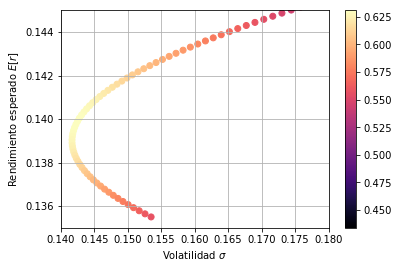

In [27]:
# Gráfica de dispersión de puntos coloreando 
# de acuerdo a SR
plt.figure(figsize=(6, 4))
plt.scatter(portafolios['Vol'],
            portafolios['Media'],
            c=portafolios['RS'],
            cmap='magma'
           )
plt.colorbar()
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento esperado $E[r]$')
plt.grid()
plt.axis([0.14, 0.18, 0.135, 0.145])

#### 2. Encontrar el portafolio que maximiza el radio de Sharpe (EMV)

Primero, encontramos este portafolio con la fórmula que obtuvimos:

In [29]:
# Fórmula que obtuvimos
s12 = r12 * s1 * s2
wEMV = ((E1 - rf) * s2**2 - (E2 - rf) * s12) / ((E2 - rf) * s1**2 + (E1 - rf) * s2**2 - ((E1 -rf) + (E2 - rf)) * s12)
EEMV = wEMV * E1 + (1 - wEMV) * E2
sEMV = ((wEMV * s1)**2 + ((1 - wEMV) * s2)**2 + 2 * wEMV * (1 - wEMV) * s12)**0.5
RSmax = (EEMV - rf) / sEMV
wEMV, 1 - wEMV, EEMV, sEMV, RSmax

(0.6983139170512034,
 0.3016860829487966,
 0.13978394237787292,
 0.14231708951606933,
 0.6308725303698346)

Ahora sí, con la función scipy.optimize.minimize

In [30]:
# Importar el módulo optimize de la libreria scipy
import scipy.optimize as opt

In [31]:
## Construcción de parámetros
## Activo 1: EU, Activo 2: Japon
# 1. Sigma: matriz de varianza-covarianza
#Sigma = np.array([[s1**2, r12 * s1 * s2],
#                  [r12 * s1 * s2, s2**2]]
#                )
Sigma = np.array([[s1**2, s12],
                  [s12, s2**2]]
                )
# 2. Eind: rendimientos esperados activos individuales
Eind = np.array([E1, E2])

In [35]:
# Función objetivo (-SR)
def minus_SR(w, Eind, Sigma, rf):
    Ep = Eind.dot(w)
    sp = (w.dot(Sigma).dot(w))**0.5
    RS = (Ep - rf) / sp
    return -RS

In [43]:
# Dato inicial
N = len(Eind)
w0 = np.ones((N,)) / N
#w0 = np.array([0.5, 0.5])
# Cotas de las variables
bnds = ((0, 1),) * N
#bnds = ((0,1), (0,1))
# Restricciones
cons = {'type': 'eq', 'fun': lambda w: w.sum() - 1}

In [44]:
# Optimización numérica
EMV = opt.minimize(fun=minus_SR,
                   x0=w0,
                   args=(Eind, Sigma, rf),
                   bounds=bnds,
                   constraints=cons
                  )
# Resultado
EMV

     fun: -0.6308725303332082
     jac: array([-0.35171176, -0.3502962 ])
 message: 'Optimization terminated successfully.'
    nfev: 17
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.6983075, 0.3016925])

Con lo anterior, podemos obtener datos de rendimiento esperado y volatilidad del portafolio EMV

In [45]:
# Rendimiento esperado y volatilidad del portafolio EMV
wEMV2 = EMV.x
Ep = Eind.dot(wEMV2)
sp = (wEMV2.dot(Sigma).dot(wEMV2))**0.5
RSmax = (Ep - rf) / sp
wEMV2, Ep, sp, RSmax

(array([0.6983075, 0.3016925]),
 0.13978403352815136,
 0.14231723400720916,
 0.6308725303332082)

[0.14, 0.18, 0.135, 0.145]

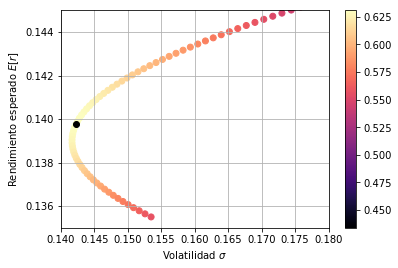

In [46]:
# Gráfica de dispersión de puntos coloreando 
# de acuerdo a SR, y portafolio EMV
plt.figure(figsize=(6, 4))
plt.scatter(portafolios['Vol'],
            portafolios['Media'],
            c=portafolios['RS'],
            cmap='magma'
           )
plt.plot(sp, Ep, 'ko')
plt.colorbar()
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento esperado $E[r]$')
plt.grid()
plt.axis([0.14, 0.18, 0.135, 0.145])

#### 3. Construir LAC

Ahora, dibujamos la LAC, combinando el portafolio EMV con el activo libre de riesgo:

In [48]:
# Vector de wp variando entre 0 y 1.5 con n pasos
import numpy as np
n_p = 51
wp = np.linspace(0, 1.5, n_p)

In [49]:
# DataFrame de CAL: 
# 1. Índice: i
# 2. Columnas 1-2: wp, wrf
# 3. Columnas 3-4: E[r], sigma
# 4. Columna 5: Sharpe ratio
LAC = pd.DataFrame(index=range(n_p),
                   data={'wp': wp,
                         'wrf': 1 - wp,
                         'Media': wp * Ep + (1 - wp)*rf,
                         'Vol': wp * sp
                        }
                  )
LAC['RS'] = (LAC['Media'] - rf) / LAC['Vol']
LAC

,wp,wrf,Media,Vol,RS
0,0.00,1.00,0.050000,0.000000,NaN
1,0.03,0.97,0.052694,0.004270,0.630873
2,0.06,0.94,0.055387,0.008539,0.630873
3,0.09,0.91,0.058081,0.012809,0.630873
4,0.12,0.88,0.060774,0.017078,0.630873
5,0.15,0.85,0.063468,0.021348,0.630873
6,0.18,0.82,0.066161,0.025617,0.630873
7,0.21,0.79,0.068855,0.029887,0.630873
8,0.24,0.76,0.071548,0.034156,0.630873
9,0.27,0.73,0.074242,0.038426,0.630873


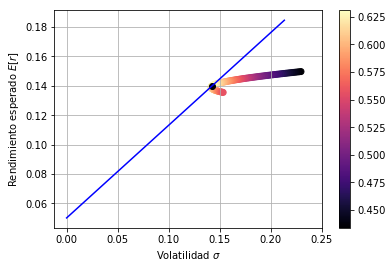

In [55]:
# Gráfica de dispersión de puntos coloreando 
# de acuerdo a SR, portafolio EMV y LAC
plt.figure(figsize=(6, 4))
plt.scatter(portafolios['Vol'],
            portafolios['Media'],
            c=portafolios['RS'],
            cmap='magma'
           )
plt.plot(sp, Ep, 'ko')
plt.plot(LAC['Vol'], LAC['Media'], '-b')
plt.colorbar()
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento esperado $E[r]$')
plt.grid()
#plt.axis([0.1, 0.18, 0.10, 0.145])

#### 4. Combinación óptima de acuerdo a preferencias

Con los datos anteriores, y la caracterización de aversión al riesgo, se escoge la combinación óptima entre el portafolio EMV y el activo libre de riesgo de acuerdo a:

$$w^\ast=\frac{E[r_s-r_f]}{\gamma\sigma_s^2}.$$

In [64]:
# Para gamma=7
gamma = 20
wopt = (Ep - rf) / (gamma * sp**2)
wopt

0.22164305494486033

In [65]:
wopt * wEMV2, 1 - wopt

(array([0.15477501, 0.06686805]), 0.7783569450551396)

# Anuncios parroquiales

- [Calificaciones](https://docs.google.com/spreadsheets/d/1AoEaDByByOPQLZfuZhRy3CIGB2UMr89PoJauRdRuG3o/edit?usp=sharing)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>